In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
# Set Paths
datpath    = "/Users/gliu/Downloads/2020_Fall/6.862/Project/CESM_data/Metrics/Classification/"
outfigpath = "/Users/gliu/Downloads/2020_Fall/6.862/Project/CESM_data/Figures/Classification/"


# Settings+Names for labeling/plotting, Data is formatted as [Class1, Class2, Class3]
classes   = ["AMV+","Neutral","AMV-"] # [Class1 = AMV+, Class2 = Neutral, Class3 = AMV-]
leads     = np.arange(0,25,3)
expnames  = ['simplecnn','resnet50(transfer)','resnet50(retrained)']
expcolors = ("b","orange","red")
baseline  = 0.69476744

# Name of each of the files
fn0 = "leadtime_testing_ALL_AMVClass3_simplecnn_nepoch20_nens40_maxlead24_detrend0_noise0_netnamesimplecnn_run0_ALL.npz"
fn1 = "leadtime_testing_ALL_AMVClass3_resnet50_nepoch20_nens40_maxlead24_detrend0_noise0_netnameresnet50_run0_ALL.npz"
fn2 = "leadtime_testing_ALL_AMVClass3_resnet50_nepoch20_nens40_maxlead24_detrend0_noise0_netnameresnet50_run0_unfreezeall_ALL.npz"
fns = [fn0,fn1,fn2]


In [3]:
# Load in the data (stored in dictionaries, print message indicates the keys)
ld = np.load(datpath+fn1)
ld.files

trainloss  = [] # Train Losses by Epoch
testloss   = [] # Test  ""
trainacc   = [] # Train Accuracies
testacc    = [] # Test  ""
totalacc   = [] # Total Prediction Accuracy by Lead Time (all classes together)
accbyclass = [] # Accuracy by each class, for each lead time
ypred      = [] # Predictions
ylab       = [] # Corresponding Labels
for i,fn in enumerate(fns):
    ld = np.load(datpath+fn,allow_pickle=True)
    print(ld.files)
    trainloss.append(ld['train_loss'])
    testloss.append(ld['test_loss'])
    trainacc.append(ld['train_acc'])
    testacc.append(ld['test_acc'])
    totalacc.append(ld['total_acc'])
    accbyclass.append(ld['acc_by_class'])
    ypred.append(ld['yvalpred'])
    ylab.append(ld['yvallabels'])


['train_loss', 'test_loss', 'train_acc', 'test_acc', 'total_acc', 'acc_by_class', 'yvalpred', 'yvallabels']
['train_loss', 'test_loss', 'train_acc', 'test_acc', 'total_acc', 'acc_by_class', 'yvalpred', 'yvallabels']
['train_loss', 'test_loss', 'train_acc', 'test_acc', 'total_acc', 'acc_by_class', 'yvalpred', 'yvallabels']


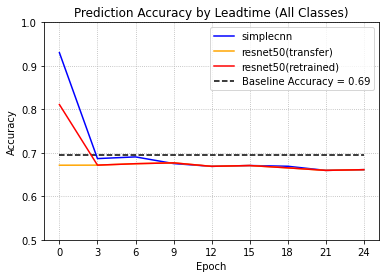

In [4]:
# Plot total accuracy for each experiment (exp=network type)
fig,ax = plt.subplots(1,1)

for i in range(3):
    ax.plot(leads,totalacc[i],label=expnames[i],color=expcolors[i])
ax.set_ylim([0.5,1])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Epoch")
ax.set_xticks(leads)
ax.grid(True,ls='dotted')
ax.hlines([baseline],xmin=0,xmax=24,ls='dashed',color='k',label="Baseline Accuracy = %.2f" % baseline)
ax.legend()
ax.set_title("Prediction Accuracy by Leadtime (All Classes)")
plt.savefig("%sTotal_Accuracy.png"%outfigpath,dpi=200)



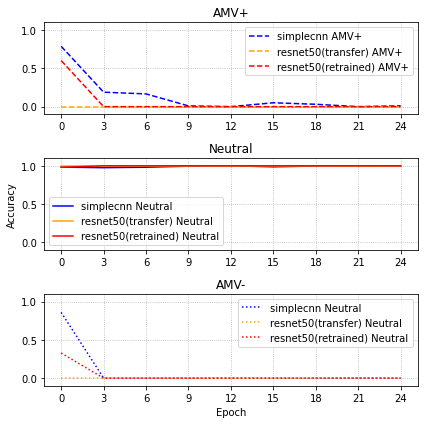

In [5]:
# Plot total accuracy by exp

fig,axs = plt.subplots(3,1,sharey=True,figsize=(6,6))

for i in range(3):
    accmodel = np.array(accbyclass[i])
    
    ax = axs[0]
    ax.plot(leads,accmodel[:,0],label=expnames[i] + " AMV+",color=expcolors[i],ls='dashed')
    
    ax = axs[1]
    ax.plot(leads,accmodel[:,1],label=expnames[i] + " Neutral",color=expcolors[i],ls='solid')
    
    ax = axs[2]
    ax.plot(leads,accmodel[:,2],label=expnames[i] + " Neutral",color=expcolors[i],ls='dotted')

for i,ax in enumerate(axs):
    ax.set_ylim([-.1,1.1])
    if i == 1:
        ax.set_ylabel("Accuracy")
    if i == 2:
        ax.set_xlabel("Epoch")
    ax.set_xticks(leads)
    ax.legend()
    ax.grid(True,ls='dotted')
    ax.set_title(classes[i])
plt.tight_layout()
#ax.hlines([baseline],xmin=0,xmax=24,ls='dashed',color='k',label="Baseline Accuracy = %.2f" % baseline)
#ax.legend()
#ax.set_title("Prediction Accuracy by Leadtime (All Classes)")
plt.savefig("%sAcc_by_class.png"%outfigpath,dpi=200)


In [9]:
np.array(accbyclass[1]) # Note class in fourth axis is a bug, ignore it...

array([[ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan],
       [ 0.,  1.,  0., nan]])

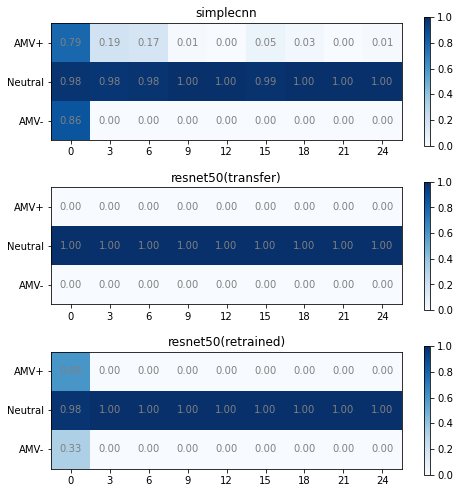

In [10]:
# 

fig,axs = plt.subplots(3,1,sharey=True,figsize=(7,7))

for m in range(3):
    ax = axs[m]
    accmodel = np.array(accbyclass[m])
    
    
    im = ax.imshow(accmodel[:,:-1].T,vmin=0,vmax=1,cmap='Blues')
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(leads)))
    ax.set_yticks(np.arange(len(classes)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(leads)
    ax.set_yticklabels(classes)
    ax.set_title(expnames[m])
    
    fig.colorbar(im,ax=ax)
    
    for i in range(len(leads)):
        for j in range(len(classes)):
            text = ax.text(i, j, "%.2f" % (accmodel[:,:-1])[i, j],
                           ha="center", va="center", color="gray")
    
    
plt.tight_layout()
plt.savefig("%sAcc_by_class_heatmap.png"%outfigpath,dpi=200)

In [145]:
def make_acc_heatmap(accbyclass,leads,title,classes,ax=None):
    """
    Plot heatmap of accuracy by leadtime
    accbyclass ARRAY [lead x class]
    leads ARRAY [lead]
    title STR
    classes ARRAY [class]
    
    """
    
    if ax is None:
        ax = plt.gca()
    
    im = ax.imshow(accbyclass[:,:].T,vmin=0.30,vmax=1,cmap='Blues')
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(leads)))
    ax.set_yticks(np.arange(len(classes)))
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(leads)
    ax.set_yticklabels(classes)
    ax.set_title(title)
    ax.set_xlabel("Lead Time (Years)")
    fig.colorbar(im,ax=ax,fraction=0.016)
    
    for i in range(len(leads)):
        for j in range(len(classes)):
            if accbyclass[:,:][i,j] > 0.66:
                col = 'w'
            elif accbyclass[:,:][i,j] < 0.33:
                col = 'gray'
            else:
                col = 'k'
            text = ax.text(i, j, "%.2f" % (accbyclass[:,:])[i, j],
                           ha="center", va="center", color=col)
    
    return ax
    
    

In [8]:
ypred = np.array(ypred) # [3x9]
ylab = np.array(ylab)

# Count Up the predictions
allpreds = np.zeros((3,len(leads),3))
alllabs  = np.zeros(allpreds.shape)

for i in range(3):
    
    ypreds  = ypred[i,:]
    ylabels = ylab[i,:]
    
    for l in range(len(leads)):
        for c in range(3):
            allpreds[i,l,c] = (ypreds[l]==c).sum()
            alllabs[i,l,c] = (ylabels[l]==c).sum()
            

    
    
    
    
    

NameError: name 'allpreds' is not defined

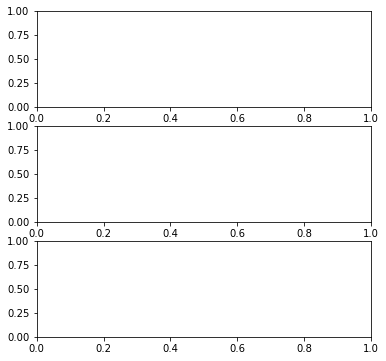

In [12]:
#Visualize prediction frequency
i = 0

for i in range(3):
    fig,axs = plt.subplots(3,1,figsize=(6,6))
    for c in range(3):
        ax = axs[c]
        ax.plot(leads,allpreds[i,:,c],label="Predicted")
        ax.plot(leads,alllabs[i,:,c],label="Actual")
        ax.set_title("%s Predictions (%s)" % (classes[c],expnames[i]))
        ax.grid(True,ls='dotted')
        ax.set_ylabel("Counts")
        ax.legend()
        ax.set_xticks(leads)
    plt.tight_layout()
    plt.savefig("%sCountvsLead_%s.png"%(outfigpath,expnames[i]),dpi=200)


In [10]:
np.array(ypred[l]).shape

IndexError: index 8 is out of bounds for axis 0 with size 3

In [11]:
ypred = np.array(ypred) # [3x9]
ypreds = np.array(ypred[i,:])
ypreds

array([array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 2., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.,

# Visualize and Load 10-run results

In [13]:
# Read in simplecnn results

def load_result(fn):
    
    ld = np.load(fn,allow_pickle=True)
    vnames = ld.files
    output = []
    for v in vnames:
        output.append(ld[v])
    return output,vnames


totalacc = []
classacc = []
ypred    = []
ylabs    = []
for m in range(3):
    fpath = "/Users/gliu/Downloads/2020_Fall/6.862/Project/CESM_data/Metrics/Classification/10run/"
    
    if m == 0:
        flist = glob.glob(fpath+"*simplecnn*.npz")
    elif m == 1:
        flist = glob.glob(fpath+"*resnet50*unfreeze_allFalse*.npz")
    else:
        flist = glob.glob(fpath+"*resnet50*unfreeze_allTrue*.npz")

    flist.sort()
    print('Found %i files'%(len(flist)))

    # Load Result for each model
    totalm = []
    classm = []
    ypredm = []
    ylabsm = []
    for i in range(10):
        output,vnames = load_result(flist[i])
        totalm.append(output[4])
        classm.append(output[5])
        ypredm.append(output[6])
        ylabsm.append(output[7])

        print("Loaded %s, %s, %s, and %s for run %i, model %s" % (vnames[4],vnames[5],vnames[6],vnames[7],i,expnames[m]))
    totalacc.append(totalm)
    classacc.append(classm)
    ypred.append(ypredm)
    ylabs.append(ylabsm)
        
classacc = np.array(classacc) # [model x run x lead x class]
totalacc = np.array(totalacc) # [model x run x lead]
ypred    = np.array(ypred)    # [model x run x lead x sample]
ylabs    = np.array(ylabs)    # [model x run x lead x sample]
print(vnames)

Found 10 files
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 0, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 1, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 2, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 3, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 4, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 5, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 6, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 7, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 8, model simplecnn
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 9, model simplecnn
Found 10 files
Loaded total_acc, acc_by_class, yvalpred, and yvallabels for run 0, model resnet50(transfer)
Loaded total_acc, acc_by_class, yvalp

In [127]:
classacc.shape,ypred.shape

((1, 10, 9, 3), (1, 10, 9, 180))

In [11]:
# Count Up predictions

def count_predictions(ypred,ylabs,nclass):
    # ypred [model x run x class x leadtime]
    # ylabs [class x leadtime]
    nmodels,nruns,nlead,nsamples = ypred.shape
    # Count Up the predictions
    allpreds = np.zeros((nmodels,nlead,nclass))
    alllabs  = np.zeros(allpreds.shape)
    for m in range(nmodels):
        for l in range(nlead):
            for c in range(nclass):
                allpreds[m,l,c] = (ypred[m,:,l,:]==c).sum()
                alllabs[m,l,c]  = (ylabs[m,:,l,:]==c).sum()
    return allpreds,alllabs


allpreds,alllabs=count_predictions(ypred,ylabs,3)

allpreds,alllabs

NameError: name 'ylabs' is not defined

# Visualization Loops

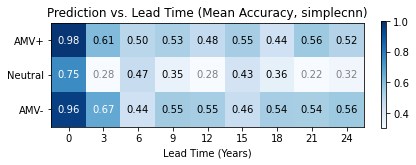

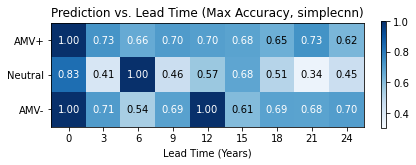

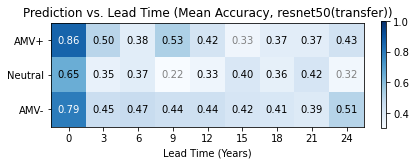

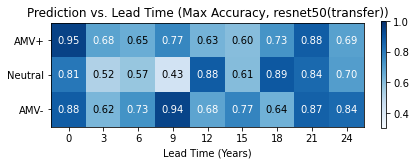

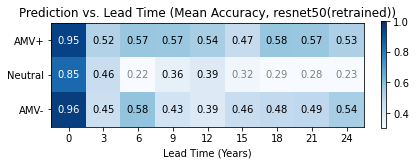

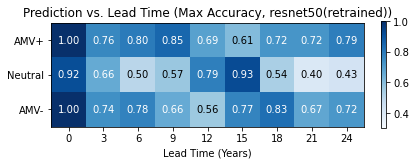

In [156]:

i = 0
for i in range(3):
    
    # Simple CNN Test Heatmap (Mean Acc)
    fig,ax = plt.subplots(1,1)
    title = "Prediction vs. Lead Time (Mean Accuracy, %s)" % expnames[i]

    ax = make_acc_heatmap(classacc[i,:,:,:].mean(0),leads,title,classes,ax=None)
    plt.savefig("%sHeatmap_%s_MeanAcc.png"% (outfigpath,expnames[i]),dpi=200)
    
    
    
    # Simple CNN Test Heatmap (Max Acc)
    fig,ax = plt.subplots(1,1)
    title = "Prediction vs. Lead Time (Max Accuracy, %s)" % expnames[i]

    ax = make_acc_heatmap(classacc[i,:,:,:].max(0),leads,title,classes,ax=None)
    plt.savefig("%sHeatmap_%s_MaxAcc.png"% (outfigpath,expnames[i]),dpi=200)

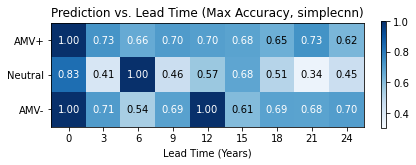

In [147]:

i = 0


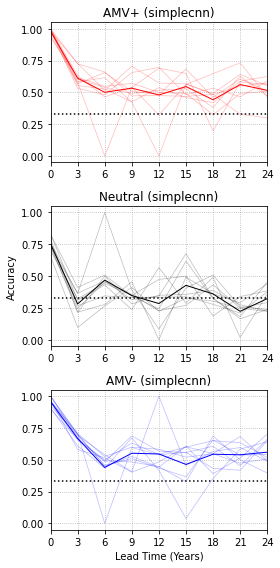

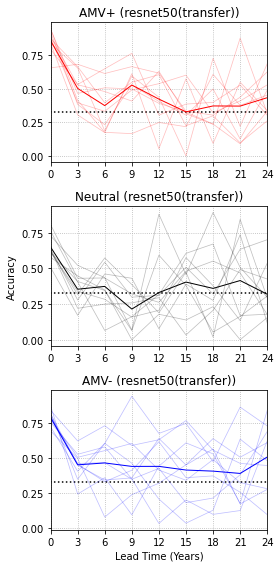

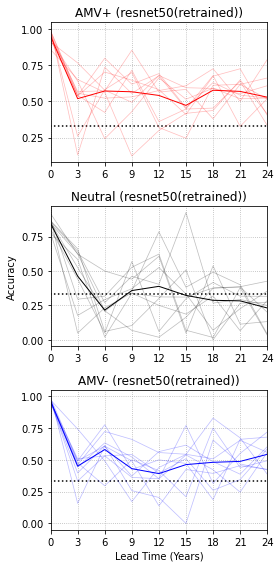

In [157]:
# Plot Accuracy vs Leadtime for each Predictor
classcol = ['r','k','b']
for i in range(3):

    fig,axs = plt.subplots(3,1,figsize=(4,8))
    for c in range(3):
        ax = axs[c]

        if c == 1:
            ax.set_ylabel("Accuracy")
        if c == 2:
            ax.set_xlabel("Lead Time (Years)")

        ax.grid(True,ls='dotted')
        ax.set_xticks(leads)
        ax.set_yticks(np.arange(0,1.25,.25))
        ax.set_xlim(0,24)
        ax.set_title("%s (%s)" %(classes[c],expnames[i]))

        for r in range(10):  
            ax.plot(leads,classacc[i,r,:,c],label="",color=classcol[c],alpha=0.25,lw=0.75)
        ax.plot(leads,classacc[i,:,:,c].mean(0),color=classcol[c],alpha=1,lw=1)
        ax.hlines([0.33],xmin=-1,xmax=25,ls="dotted",color='k')
    plt.tight_layout()
    plt.savefig("%sAccbyClass_Leadtime_%s.png"% (outfigpath,expnames[i]),dpi=200)

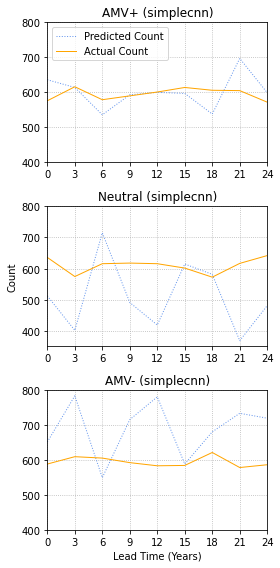

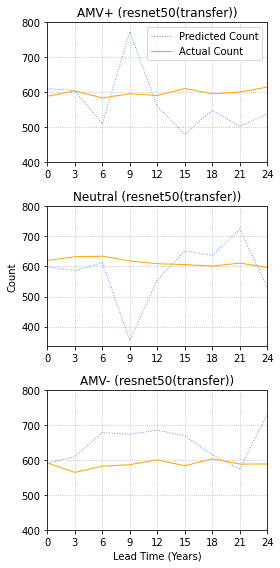

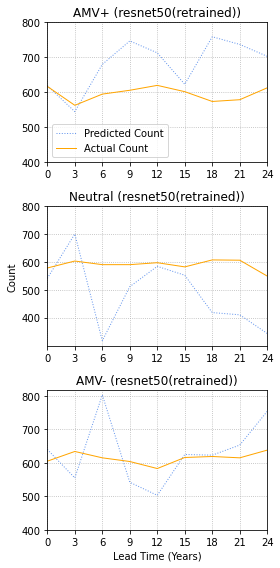

In [163]:
# Plot Predicted vs actual class
for i in range(3):
    fig,axs = plt.subplots(3,1,figsize=(4,8))
    for c in range(3):
        ax = axs[c]


        if c == 1:
            ax.set_ylabel("Count")

        if c == 2:
            ax.set_xlabel("Lead Time (Years)")

        ax.grid(True,ls='dotted')
        ax.set_xticks(leads)
        
        ax.set_xlim(0,24)
        ax.set_title("%s (%s)" %(classes[c],expnames[i]))

        ax.plot(leads,allpreds[i,:,c],label="Predicted Count",color='cornflowerblue',ls='dotted',alpha=1,lw=1)
        ax.plot(leads,alllabs[i,:,c],label="Actual Count",color='orange',alpha=1,lw=1)
        if c == 0:
            ax.legend()
        #ax.hlines([0.33],xmin=-1,xmax=25,ls="dotted",color='k')
        ax.set_yticks(np.arange(400,900,100))
    plt.tight_layout()
    plt.savefig("%sCountbyClass_Leadtime_%s.png"% (outfigpath,expnames[i]),dpi=200)

In [159]:
# Find Best Performing Run for each leadtime

i = 0
totalacc.argmax(axis=1)

array([[2, 3, 0, 6, 8, 9, 2, 3, 0],
       [1, 7, 3, 4, 3, 1, 9, 0, 1],
       [2, 6, 1, 2, 9, 9, 0, 8, 4]])

In [166]:
totalacc.shape

(3, 10, 9)

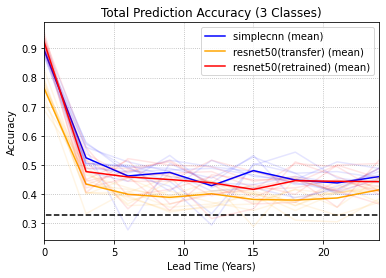

In [193]:
# Make Total Accuracy Plot

fig,ax=plt.subplots(1,1)
ax.grid(True,ls="dotted")
for m in range(3):
    
    ax.plot(leads,totalacc[m,:,:].T,label="",color=expcolors[m],alpha=0.1)
    ax.plot(leads,totalacc[m,:,:].mean(0),label="%s (mean)"%expnames[m],color=expcolors[m])

ax.legend()
ax.set_title("Total Prediction Accuracy (3 Classes)")
ax.hlines([0.33],xmin=-1,xmax=26,ls='dashed',color='k')
ax.set_xlim([0,24])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Lead Time (Years)")
plt.savefig("%sTotalPredAcc.png"%outfigpath,dpi=200)

In [169]:
expcolors

('cornflowerblue', 'orange', 'green')